In [2]:
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r'C:\Users\pjk98\Data\Tension')
file_list = glob.glob("./*.csv", recursive=True)

In [4]:
df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
df.columns=['Time','Tension','이건 뭐징??']
df.head()

,Time,Tension,이건 뭐징??
0,[2023/05/31] 20:54:14,110.0,NaN
1,[2023/05/31] 20:54:15,130.0,NaN
2,[2023/05/31] 20:54:16,104.0,NaN
3,[2023/05/31] 20:54:17,107.0,NaN
4,[2023/05/31] 20:54:18,115.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     3600 non-null   object 
 1   Tension  3600 non-null   float64
 2   이건 뭐징??  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 84.5+ KB


In [6]:
drop_columns=['Time','이건 뭐징??']
df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
df

,Tension
0,110.0
1,130.0
2,104.0
3,107.0
4,115.0
...,...
3595,98.0
3596,100.0
3597,97.0
3598,115.0


In [7]:
type_list = ['CMPS', 'JS', 'SSJD', 'SSNC']
df_list = []
num = 0

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0, encoding='CP949')
    df.columns = ['Time', 'Tension', '이건 뭐징??']
    df['type'] = type_list[num]

    drop_columns = ['Time', '이건 뭐징??']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거

    df_list.append(df.copy())  # 데이터프레임 복사하여 추가
    num += 1

new_df = pd.concat(df_list, axis=0, ignore_index=True)

print(new_df)
print(type(new_df))
new_df.info()

       Tension  type
0        110.0  CMPS
1        130.0  CMPS
2        104.0  CMPS
3        107.0  CMPS
4        115.0  CMPS
...        ...   ...
14395    181.0  SSNC
14396    188.0  SSNC
14397    160.0  SSNC
14398    157.0  SSNC
14399    167.0  SSNC

[14400 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tension  14400 non-null  float64
 1   type     14400 non-null  object 
dtypes: float64(1), object(1)
memory usage: 225.1+ KB


In [8]:
df

,Tension,type
0,152.0,SSNC
1,173.0,SSNC
2,167.0,SSNC
3,141.0,SSNC
4,148.0,SSNC
...,...,...
3595,181.0,SSNC
3596,188.0,SSNC
3597,160.0,SSNC
3598,157.0,SSNC


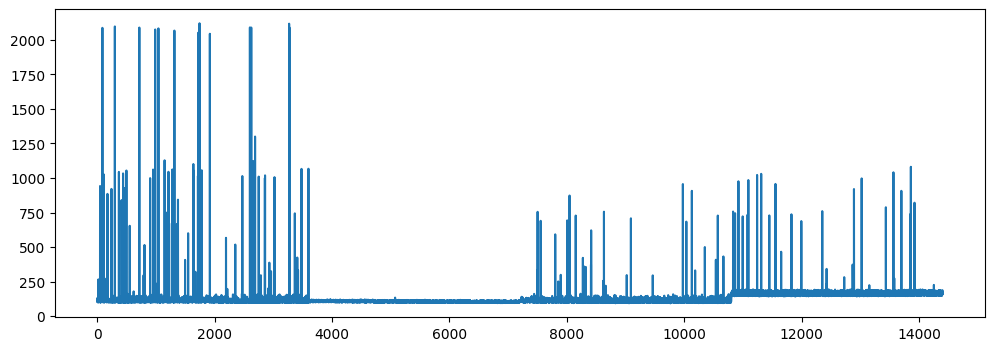

In [11]:
plt.figure(figsize=(12,4))
plt.plot(new_df['Tension'])
plt.show()

sns.jointplot(x='sepal_length', y='sepal_width', data=new_df, hue='type') # x='Tension', y = 'Internel Sound',z='Target Temp.', data = df, hue='type'
plt.show()